In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import titanic data using pandas

Original unmodified Titanic data is available at <a href="http://lib.stat.cmu.edu/S/Harrell/data/ascii/titanic.txt">CMU StatLib</a>.

In [3]:
url = "../data/titanic-trimmed.csv"
titanic = pd.read_csv(url)
titanic.head(10)

,pid,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1st,1,female,29.0,0,0,211.337494,Southampton
1,2,1st,1,male,NaN,1,2,151.550003,Southampton
2,3,1st,0,female,2.0,1,2,151.550003,Southampton
3,4,1st,0,male,30.0,1,2,151.550003,Southampton
4,5,1st,0,female,25.0,1,2,151.550003,Southampton
5,6,1st,1,male,48.0,0,0,26.549999,Southampton
6,7,1st,1,female,63.0,1,0,77.958298,Southampton
7,8,1st,0,male,39.0,0,0,0.000000,Southampton
8,9,1st,1,female,53.0,2,0,51.479198,Southampton
9,10,1st,0,male,71.0,0,0,49.504200,Cherbourg


In [4]:
titanic.describe(include="all")

,pid,pclass,survived,sex,age,sibsp,parch,fare,embarked
count,1309.000000,1309,1309.000000,1309,1045.000000,1309.000000,1309.000000,1308.000000,1307
unique,NaN,3,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,3rd,NaN,male,NaN,NaN,NaN,NaN,Southampton
freq,NaN,709,NaN,843,NaN,NaN,NaN,NaN,914
mean,655.000000,NaN,0.381971,NaN,29.908852,0.498854,0.385027,33.295479,NaN
std,378.020061,NaN,0.486055,NaN,14.392485,1.041658,0.865560,51.758669,NaN
min,1.000000,NaN,0.000000,NaN,0.166700,0.000000,0.000000,0.000000,NaN
25%,328.000000,NaN,0.000000,NaN,21.000000,0.000000,0.000000,7.895800,NaN
50%,655.000000,NaN,0.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,982.000000,NaN,1.000000,NaN,39.000000,1.000000,0.000000,31.275000,NaN


### Handling missing variables

In [5]:
titanic[titanic.age.isnull()].shape

(264, 9)

In [6]:
age_mean = titanic.age.mean()
titanic.age.fillna(age_mean, axis=0, inplace=True)
titanic.dropna(axis=0, inplace=True)

In [7]:
titanic.shape

(1306, 9)

In [8]:
titanic.set_index('pid', drop=True, inplace=True)
titanic.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
pid,,,,,,,,
1,1st,1,female,29.000000,0,0,211.337494,Southampton
2,1st,1,male,29.908852,1,2,151.550003,Southampton
3,1st,0,female,2.000000,1,2,151.550003,Southampton
4,1st,0,male,30.000000,1,2,151.550003,Southampton
5,1st,0,female,25.000000,1,2,151.550003,Southampton


### Creating dummy variables for categorical features

In [9]:
titanic_ssf = pd.get_dummies(titanic)
titanic_ssf.head(10)

,survived,age,sibsp,parch,fare,pclass_1st,pclass_2nd,pclass_3rd,sex_female,sex_male,embarked_Cherbourg,embarked_Queenstown,embarked_Southampton
pid,,,,,,,,,,,,,
1,1,29.000000,0,0,211.337494,1,0,0,1,0,0,0,1
2,1,29.908852,1,2,151.550003,1,0,0,0,1,0,0,1
3,0,2.000000,1,2,151.550003,1,0,0,1,0,0,0,1
4,0,30.000000,1,2,151.550003,1,0,0,0,1,0,0,1
5,0,25.000000,1,2,151.550003,1,0,0,1,0,0,0,1
6,1,48.000000,0,0,26.549999,1,0,0,0,1,0,0,1
7,1,63.000000,1,0,77.958298,1,0,0,1,0,0,0,1
8,0,39.000000,0,0,0.000000,1,0,0,0,1,0,0,1
9,1,53.000000,2,0,51.479198,1,0,0,1,0,0,0,1


In [10]:
titanic_names = titanic_ssf.columns.values
titanic_names

array(['survived', 'age', 'sibsp', 'parch', 'fare', 'pclass_1st',
       'pclass_2nd', 'pclass_3rd', 'sex_female', 'sex_male',
       'embarked_Cherbourg', 'embarked_Queenstown',
       'embarked_Southampton'], dtype=object)

In [11]:
y = titanic_ssf['survived']
X = titanic_ssf[titanic_names[1:]]
X.head()

,age,sibsp,parch,fare,pclass_1st,pclass_2nd,pclass_3rd,sex_female,sex_male,embarked_Cherbourg,embarked_Queenstown,embarked_Southampton
pid,,,,,,,,,,,,
1,29.000000,0,0,211.337494,1,0,0,1,0,0,0,1
2,29.908852,1,2,151.550003,1,0,0,0,1,0,0,1
3,2.000000,1,2,151.550003,1,0,0,1,0,0,0,1
4,30.000000,1,2,151.550003,1,0,0,0,1,0,0,1
5,25.000000,1,2,151.550003,1,0,0,1,0,0,0,1


In [12]:
titanic_ssf.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,1306.0,0.381317,0.485896,0.0000,0.0000,0.000000,1.000,1.000000
age,1306.0,29.854661,12.812320,0.1667,22.0000,29.908852,35.000,80.000000
sibsp,1306.0,0.500000,1.042580,0.0000,0.0000,0.000000,1.000,8.000000
parch,1306.0,0.385911,0.866357,0.0000,0.0000,0.000000,0.000,9.000000
fare,1306.0,33.223956,51.765986,0.0000,7.8958,14.454200,31.275,512.329224
pclass_1st,1306.0,0.245789,0.430719,0.0000,0.0000,0.000000,0.000,1.000000
pclass_2nd,1306.0,0.212098,0.408950,0.0000,0.0000,0.000000,0.000,1.000000
pclass_3rd,1306.0,0.542113,0.498414,0.0000,0.0000,1.000000,1.000,1.000000
sex_female,1306.0,0.355283,0.478782,0.0000,0.0000,0.000000,1.000,1.000000
sex_male,1306.0,0.644717,0.478782,0.0000,0.0000,1.000000,1.000,1.000000


### Build the training and testing dataset

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

### A versatile function to measure performance of a model

In [16]:
from sklearn import metrics

def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred = clf.predict(X)   
    if show_accuracy:
         print ("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")
    if show_classification_report:
        print ("Classification report")
        print (metrics.classification_report(y, y_pred),"\n")
      
    if show_confussion_matrix:
        print ("Confussion matrix")
        print (metrics.confusion_matrix(y, y_pred),"\n")

#### Let's now compare performnace of standard decision tree classifier against some ensemble methods: Random Forest Classifier and Ada Boost.

In [17]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt = dt.fit(X_train, y_train)

In [18]:
from sklearn import metrics
measure_performance(X_test, y_test, dt, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.737 



In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf = rf.fit(X_train, y_train)

/home/roselyne/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [20]:
measure_performance(X_test, y_test, rf, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.756 



### Exploring and comparing model parameters

In [21]:
print (rf.get_params())

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


### The following is a general function that performs cross-validation using a range of values for a specified parameter of a model

In [26]:
from sklearn.model_selection import KFold

def calc_params(X, y, clf, param_values, param_name, K):
    
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing scores with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):
        print (param_name, ' = ', param_value)
        
        # set classifier parameters
        clf.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        #cv = KFold(len(X), K, shuffle=True, random_state=0)
        
        #cv = KFold(n_splits=K)
        #cv.get_n_splits(X) 
        cv = KFold(n_splits=K,random_state=None, shuffle=False)
        
        # iterate over the K folds
        for j, (train, test) in enumerate(cv.split(X)):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clf.fit([X[k] for k in train], y[train])
            k_train_scores[j] = clf.score([X[k] for k in train], y[train])
            k_test_scores[j] = clf.score([X[k] for k in test], y[test])
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
       
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

### Now we can explore the impact of min_samples_leaf more systematically

In [27]:
msl = range(1,6)
print (msl)

range(1, 6)


min_samples_leaf  =  1
min_samples_leaf  =  2
min_samples_leaf  =  3
min_samples_leaf  =  4
min_samples_leaf  =  5


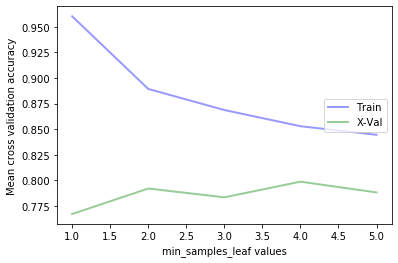

In [28]:
train_scores, test_scores = calc_params(X_train, y_train, rf, msl, 'min_samples_leaf', 5)

In [29]:
nest = range(5, 101, 5)
print (nest)

range(5, 101, 5)


n_estimators  =  5
n_estimators  =  10
n_estimators  =  15
n_estimators  =  20
n_estimators  =  25
n_estimators  =  30
n_estimators  =  35
n_estimators  =  40
n_estimators  =  45
n_estimators  =  50
n_estimators  =  55
n_estimators  =  60
n_estimators  =  65
n_estimators  =  70
n_estimators  =  75
n_estimators  =  80
n_estimators  =  85
n_estimators  =  90
n_estimators  =  95
n_estimators  =  100


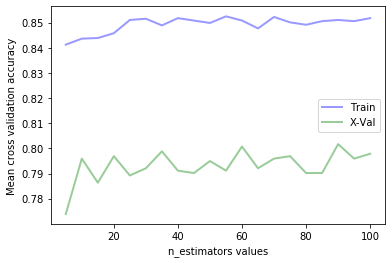

In [30]:
train_scores, test_scores = calc_params(X_train, y_train, rf, nest, 'n_estimators', 5)

In [31]:
rf = RandomForestClassifier(n_estimators=25, min_samples_leaf=3)
rf = rf.fit(X_train, y_train)

measure_performance(X_test, y_test, rf, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.813 



In [32]:
rf.feature_importances_

array([0.18227119, 0.03213797, 0.03745248, 0.19126402, 0.0221307 ,
       0.01777606, 0.07899877, 0.22977093, 0.17913775, 0.01016436,
       0.00603494, 0.01286083])

In [33]:
rf.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=3, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=729995256, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=3, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=2088329278, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                  

In [34]:
from sklearn.ensemble import AdaBoostClassifier

In [35]:
ab = AdaBoostClassifier()
ab = ab.fit(X_train, y_train)

In [36]:
measure_performance(X_test, y_test, ab, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.782 



n_estimators  =  5
n_estimators  =  10
n_estimators  =  15
n_estimators  =  20
n_estimators  =  25
n_estimators  =  30
n_estimators  =  35
n_estimators  =  40
n_estimators  =  45
n_estimators  =  50
n_estimators  =  55
n_estimators  =  60
n_estimators  =  65
n_estimators  =  70
n_estimators  =  75
n_estimators  =  80
n_estimators  =  85
n_estimators  =  90
n_estimators  =  95
n_estimators  =  100


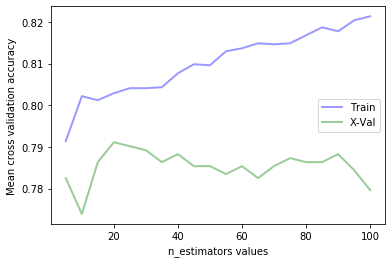

In [37]:
train_scores, test_scores = calc_params(X_train, y_train, ab, nest, 'n_estimators', 5)

In [38]:
ab = AdaBoostClassifier(n_estimators=20)
ab = ab.fit(X_train, y_train)
measure_performance(X_test, y_test, ab, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.809 

